# changing colorspaces

In [1]:
import cv2 as cv
flags = [i for i in dir(cv) if i.startswith('COLOR_')]
# print(flags)

In [2]:
import cv2 as cv
import numpy as np

cap = cv.VideoCapture(0)
# img = cv.imread('123.jpg')
# hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
while True:
    _, frame = cap.read()
    hsv = cv.cvtColor(frame,cv.COLOR_BGR2HSV)
    cv.imshow('img',frame)
    cv.imshow('hsv',hsv)
    if cv.waitKey(0):
        break
cap.release()


KeyboardInterrupt: 

## Geometric transformation

In [14]:
# Translation
import numpy as np
import cv2 as cv
img = cv.imread('123.jpg')
rows,cols = img.shape[:2]

# Scaling
res = cv.resize(img, (0,0), fx=0.2, fy=0.2, interpolation=cv.INTER_LINEAR)
# Shift
M = np.float32([[1,0,500],[0,1,500]])
# Rotation
M = cv.getRotationMatrix2D((cols/2,rows/2),180,0.5)
# Affine transform
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv.getAffineTransform(pts1,pts2)
dst = cv.warpAffine(img,M,(cols,rows))

# Perspective transform
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img,M,(cols,rows))

cv.imshow('img',dst)
cv.waitKey(0)
cv.destroyAllWindows()
cv.waitKey(1)

-1

## Image Thresholding

### simple threshold

uint8


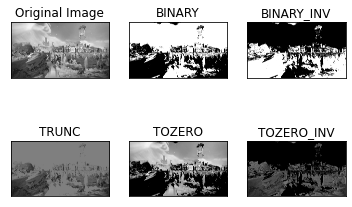

In [24]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('123.jpg',0)

ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Adaptive Thresholding

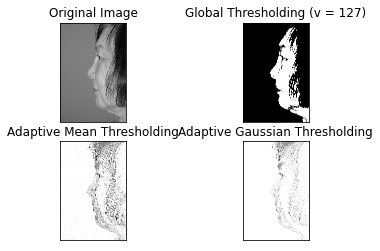

In [29]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('test.jpg',0)

img = cv.medianBlur(img,5)

ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# Otsu's Binarization

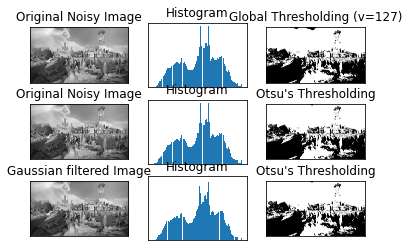

In [30]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('123.jpg',0)

# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()